In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILEPATH = "/Users/raymondmbp/makeschool/DS-1.1-Data-Analysis/datasets/SA_Feedback_Surveys_FINAL/2016"

import os
dir_path = os.path.dirname(os.path.realpath(FILEPATH))
dir_path

# Change default Pandas behavior
pd.set_option('display.max_rows', 500)

# 2016 NPS analysis
## Data Exploration

In [3]:
import glob

all_csvs = glob.glob(os.path.join(FILEPATH, "*.csv"))
read_all_csvs = (pd.read_csv(f) for f in all_csvs)
df = pd.concat(read_all_csvs, ignore_index = True, sort = True)
df.head(5000)

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Start Date (UTC),Submit Date (UTC),Timestamp,Unnamed: 0,What track are you in?,location,track
0,NaN,NaN,NaN,3,3,NaN,NaN,NaN,8/5/16 1:39,NaN,NaN,Taipei,NaN
1,NaN,NaN,NaN,3,4,NaN,NaN,NaN,8/5/16 1:40,NaN,NaN,Taipei,NaN
2,NaN,NaN,NaN,3,4,NaN,NaN,NaN,8/5/16 1:40,NaN,NaN,Taipei,NaN
3,NaN,NaN,NaN,4,4,NaN,NaN,NaN,8/5/16 1:42,NaN,NaN,Taipei,NaN
4,NaN,NaN,NaN,4,5,NaN,NaN,NaN,8/5/16 1:45,NaN,NaN,Taipei,NaN
5,NaN,NaN,NaN,3,4,NaN,NaN,NaN,8/5/16 1:45,NaN,NaN,Taipei,NaN
6,NaN,NaN,NaN,3,4,NaN,NaN,NaN,8/5/16 1:49,NaN,NaN,Taipei,NaN
7,NaN,NaN,NaN,3,5,NaN,NaN,NaN,8/8/16 1:30,NaN,NaN,Taipei,NaN
8,NaN,NaN,NaN,3,5,NaN,NaN,NaN,8/8/16 1:33,NaN,NaN,Taipei,NaN
9,NaN,NaN,NaN,3,5,NaN,NaN,NaN,8/8/16 1:49,NaN,NaN,Taipei,NaN


In [4]:
sum_of_pacings = df["How well are the tutorials paced?"].notna().sum() + df["How well is the schedule paced?"].notna().sum() + df["How likely is it that you would recommend the Make School Summer Academy to a friend?"].notna().sum()

print(sum_of_pacings)

992


In [5]:
def clean_pacings(df):
    # Create Pacings column with Schedule and Tutorial Pacings
    # Rename Recommendation Likelihood column to Shorter Name
    # Since you have two different columns with NaNs, map over NaNs and replace with something else
    df["Pacings"]

In [6]:
df.isna().sum()

#                                                                                        927
How likely is it that you would recommend the Make School Summer Academy to a friend?    927
How well are the tutorials paced?                                                        776
How well is the schedule paced?                                                          281
How would you rate your overall satisfaction with the Summer Academy this week?           65
Network ID                                                                               927
Start Date (UTC)                                                                         927
Submit Date (UTC)                                                                        927
Timestamp                                                                                170
Unnamed: 0                                                                               930
What track are you in?                                                

# Pseudo Brainstorm

- [X] find out all the answers that don't answer a question and drop those
- [X] append location column to all files https://stackoverflow.com/questions/45211681/add-column-to-csv-file-and-insert-filename-in-that-column
- [X] delete #REF! columns
- [X] multiply values in questions by 2 to conform with 2017 version
- [X] combine "What track are you in?" with "track"
- [X] 4 week program keep
- [X] Add 2016 year columns
- [X] Schedule pacing + tutorial pacing combine
- [X] Start/submit date combined with unnamed: 0 to Timestamp column
- [X] Convert pacing columns from str to int
- [ ] (OPTIONAL) Iterate through each CSV and get week number

## Adding year column to discern dfs

In [7]:
df['Year'] = 2016

## Checking to see if columns overlap with timestamp

In [8]:
df[~df['Unnamed: 0'].isin(df['Timestamp'])]

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Start Date (UTC),Submit Date (UTC),Timestamp,Unnamed: 0,What track are you in?,location,track,Year
505,NaN,NaN,4.0,NaN,3,NaN,NaN,NaN,NaN,6/24/16 13:48,Apps,Sunnyvale,NaN,2016
506,NaN,NaN,3.0,NaN,3,NaN,NaN,NaN,NaN,6/24/16 13:49,Apps,Sunnyvale,NaN,2016
507,NaN,NaN,5.0,NaN,3,NaN,NaN,NaN,NaN,6/24/16 13:53,Apps,Sunnyvale,NaN,2016
508,NaN,NaN,3.0,NaN,3,NaN,NaN,NaN,NaN,6/24/16 13:55,Apps,Sunnyvale,NaN,2016
510,NaN,NaN,4.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:46,Apps,Sunnyvale,NaN,2016
511,NaN,NaN,3.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:46,Apps,Sunnyvale,NaN,2016
515,NaN,NaN,4.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:48,Apps,Sunnyvale,NaN,2016
516,NaN,NaN,4.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:48,Apps,Sunnyvale,NaN,2016
517,NaN,NaN,3.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:48,Apps,Sunnyvale,NaN,2016
518,NaN,NaN,4.0,NaN,4,NaN,NaN,NaN,NaN,6/24/16 13:49,Apps,Sunnyvale,NaN,2016


In [9]:
df[~df['Submit Date (UTC)'].isin(df['Timestamp'])]

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Start Date (UTC),Submit Date (UTC),Timestamp,Unnamed: 0,What track are you in?,location,track,Year
405,00b836bda84e6bdbe780af97e249e59f,10.0,NaN,NaN,NaN,3212b7a834,9/7/16 1:03,9/7/16 1:04,NaN,NaN,NaN,New York,summerApps,2016
406,39dde6dc0e1e375845d756fc7e39fc5f,10.0,NaN,NaN,NaN,f4954355aa,9/7/16 1:03,9/7/16 1:04,NaN,NaN,NaN,San Francisco,summerIntro,2016
407,5e56b9de91670b308cb98dd2848b8739,10.0,NaN,NaN,NaN,3d69ca289b,9/7/16 1:03,9/7/16 1:05,NaN,NaN,NaN,New York,summerIntro,2016
408,641081d05785b47a0f17448625da0d49,9.0,NaN,NaN,NaN,261608f95d,9/7/16 1:04,9/7/16 1:06,NaN,NaN,NaN,Sunnyvale,summerApps (4-week),2016
409,c29bdd4f5678d78b450f4494e0f53c8c,3.0,NaN,NaN,NaN,d6672ddf6f,9/7/16 1:04,9/7/16 1:11,NaN,NaN,NaN,San Francisco,summerIntro,2016
410,9030d8a662b39b519b2b685834413d66,10.0,NaN,NaN,NaN,088e6f938d,9/7/16 1:09,9/7/16 1:13,NaN,NaN,NaN,San Francisco,summerApps,2016
411,1c07190c7caa72bf6b59cea48e1a4a97,8.0,NaN,NaN,NaN,00f1d07a90,9/7/16 1:04,9/7/16 1:14,NaN,NaN,NaN,San Francisco,summerApps,2016
412,27a63d6c24710feb52c0cfdef7e01175,3.0,NaN,NaN,NaN,e0724aac23,9/7/16 1:14,9/7/16 1:15,NaN,NaN,NaN,New York,summerGames,2016
413,b47b95f84547d8347119de1da5faa46d,6.0,NaN,NaN,NaN,9eeec0f9bf,9/7/16 1:16,9/7/16 1:21,NaN,NaN,NaN,Singapore,summerApps,2016
414,828fafa477484f61d2ca5930fe99ad46,9.0,NaN,NaN,NaN,6c80fd2754,9/7/16 1:22,9/7/16 1:27,NaN,NaN,NaN,New York,summerGames,2016


In [10]:
# Note: There aren't any instances where there are submit but not start date
df[~df['Submit Date (UTC)'].isin(df['Start Date (UTC)'])]

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Start Date (UTC),Submit Date (UTC),Timestamp,Unnamed: 0,What track are you in?,location,track,Year
407,5e56b9de91670b308cb98dd2848b8739,10.0,NaN,NaN,NaN,3d69ca289b,9/7/16 1:03,9/7/16 1:05,NaN,NaN,NaN,New York,summerIntro,2016
408,641081d05785b47a0f17448625da0d49,9.0,NaN,NaN,NaN,261608f95d,9/7/16 1:04,9/7/16 1:06,NaN,NaN,NaN,Sunnyvale,summerApps (4-week),2016
409,c29bdd4f5678d78b450f4494e0f53c8c,3.0,NaN,NaN,NaN,d6672ddf6f,9/7/16 1:04,9/7/16 1:11,NaN,NaN,NaN,San Francisco,summerIntro,2016
410,9030d8a662b39b519b2b685834413d66,10.0,NaN,NaN,NaN,088e6f938d,9/7/16 1:09,9/7/16 1:13,NaN,NaN,NaN,San Francisco,summerApps,2016
412,27a63d6c24710feb52c0cfdef7e01175,3.0,NaN,NaN,NaN,e0724aac23,9/7/16 1:14,9/7/16 1:15,NaN,NaN,NaN,New York,summerGames,2016
413,b47b95f84547d8347119de1da5faa46d,6.0,NaN,NaN,NaN,9eeec0f9bf,9/7/16 1:16,9/7/16 1:21,NaN,NaN,NaN,Singapore,summerApps,2016
414,828fafa477484f61d2ca5930fe99ad46,9.0,NaN,NaN,NaN,6c80fd2754,9/7/16 1:22,9/7/16 1:27,NaN,NaN,NaN,New York,summerGames,2016
415,7d70f1e30217d867f3c0f961462d8ae8,10.0,NaN,NaN,NaN,6c04cd1a6e,9/7/16 1:28,9/7/16 1:29,NaN,NaN,NaN,Sunnyvale,summerGames,2016
416,65bd071ab808290560e7d11c09f56796,10.0,NaN,NaN,NaN,82eadbe830,9/7/16 1:22,9/7/16 1:33,NaN,NaN,NaN,San Francisco,summerVR,2016
417,d66976d012b4c8a5c708f1a438605488,8.0,NaN,NaN,NaN,ccea45b0f4,9/7/16 1:30,9/7/16 1:36,NaN,NaN,NaN,San Francisco,summerIntro,2016


In [11]:
df['Timestamp'].fillna(df['Submit Date (UTC)'], inplace = True)
df['Timestamp'].fillna(df['Unnamed: 0'], inplace = True)

df.drop(columns = ['Start Date (UTC)', 'Unnamed: 0', 'Submit Date (UTC)'], inplace = True)

df['Timestamp'].isna().sum()

43

In [12]:
df

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Timestamp,What track are you in?,location,track,Year
0,NaN,NaN,NaN,3,3,NaN,8/5/16 1:39,NaN,Taipei,NaN,2016
1,NaN,NaN,NaN,3,4,NaN,8/5/16 1:40,NaN,Taipei,NaN,2016
2,NaN,NaN,NaN,3,4,NaN,8/5/16 1:40,NaN,Taipei,NaN,2016
3,NaN,NaN,NaN,4,4,NaN,8/5/16 1:42,NaN,Taipei,NaN,2016
4,NaN,NaN,NaN,4,5,NaN,8/5/16 1:45,NaN,Taipei,NaN,2016
5,NaN,NaN,NaN,3,4,NaN,8/5/16 1:45,NaN,Taipei,NaN,2016
6,NaN,NaN,NaN,3,4,NaN,8/5/16 1:49,NaN,Taipei,NaN,2016
7,NaN,NaN,NaN,3,5,NaN,8/8/16 1:30,NaN,Taipei,NaN,2016
8,NaN,NaN,NaN,3,5,NaN,8/8/16 1:33,NaN,Taipei,NaN,2016
9,NaN,NaN,NaN,3,5,NaN,8/8/16 1:49,NaN,Taipei,NaN,2016


## There's overlap between "What track are you in?" and "track" columns. Combining results

In [13]:
df['track'].unique()

array([nan, 'summerApps', 'summerIntro', 'summerApps (4-week)',
       'summerGames', 'summerVR', 'summerGames (4-week)'], dtype=object)

In [14]:
df['What track are you in?'].unique()

array([nan, 'Intro', 'Games', 'Apps', 'VR', 'Average:'], dtype=object)

## Homogenizing results of two track columns

In [15]:
df.replace('summerApps (4-week)', 'Apps, Explorer', inplace = True)
df.replace('summerGames (4-week)', 'Games, Explorer', inplace = True)
df.replace('summerApps', 'Apps', inplace = True)
df.replace('summerIntro', 'Intro', inplace = True)
df.replace('summerGames', 'Games', inplace = True)
df.replace('summerVR', 'VR', inplace = True)

## Dropping column that was Average: #REF! #REF!

In [16]:
df = df[df["What track are you in?"] != "Average:"]

In [17]:
# Sanity check to make sure items were replaced
df['track'].sort_values().unique()

array(['Apps', 'Apps, Explorer', 'Games', 'Games, Explorer', 'Intro',
       'VR', nan], dtype=object)

In [18]:
# Sanity check to make sure items were replaced
df['What track are you in?'].sort_values().unique()

array(['Apps', 'Games', 'Intro', 'VR', nan], dtype=object)

## Combining and dropping columns

In [19]:
df['What track are you in?'].fillna(df['track'], inplace = True)
df.drop(columns = ['track'], inplace = True)
df['How well is the schedule paced?'].fillna(df['How well are the tutorials paced?'], inplace = True)
df.drop(columns = ['How well are the tutorials paced?'], inplace = True)

df

/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Timestamp,What track are you in?,location,Year
0,NaN,NaN,3,3,NaN,8/5/16 1:39,NaN,Taipei,2016
1,NaN,NaN,3,4,NaN,8/5/16 1:40,NaN,Taipei,2016
2,NaN,NaN,3,4,NaN,8/5/16 1:40,NaN,Taipei,2016
3,NaN,NaN,4,4,NaN,8/5/16 1:42,NaN,Taipei,2016
4,NaN,NaN,4,5,NaN,8/5/16 1:45,NaN,Taipei,2016
5,NaN,NaN,3,4,NaN,8/5/16 1:45,NaN,Taipei,2016
6,NaN,NaN,3,4,NaN,8/5/16 1:49,NaN,Taipei,2016
7,NaN,NaN,3,5,NaN,8/8/16 1:30,NaN,Taipei,2016
8,NaN,NaN,3,5,NaN,8/8/16 1:33,NaN,Taipei,2016
9,NaN,NaN,3,5,NaN,8/8/16 1:49,NaN,Taipei,2016


In [20]:
df['How likely is it that you would recommend the Make School Summer Academy to a friend?'].unique()

array([nan, 10.,  9.,  3.,  8.,  6.,  7.,  4.,  5.])

In [21]:
df[~df['How would you rate your overall satisfaction with the Summer Academy this week?'].isin(df['How likely is it that you would recommend the Make School Summer Academy to a friend?'])]

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Network ID,Timestamp,What track are you in?,location,Year
24,NaN,NaN,3,2,NaN,6/23/16 22:24,NaN,Singapore,2016
25,NaN,NaN,3,2,NaN,6/27/16 4:03,NaN,Singapore,2016
79,NaN,NaN,3,2,NaN,7/22/16 14:37,Apps,Sunnyvale,2016
91,NaN,NaN,2,2,NaN,7/22/16 16:21,Apps,Sunnyvale,2016
126,NaN,NaN,2,2,NaN,7/29/16 6:54,Apps,New York,2016
139,NaN,NaN,1,2,NaN,7/29/16 13:17,Apps,New York,2016
292,NaN,NaN,3,1,NaN,8/1/16 1:39,Games,Los Angeles,2016
307,NaN,NaN,3,1,NaN,NaN,Apps,San Francisco,2016
314,NaN,NaN,5,1,NaN,NaN,Games,San Francisco,2016
351,NaN,NaN,2,2,NaN,7/24/16 11:16,NaN,Singapore,2016


## Convert pacing columns to be out of 10 (currently out of 5) but also need to convert str to int

In [22]:
df['How well is the schedule paced?'].unique()

array([3, 4, 1, 2, 5, nan, '2', '3', '4', '5'], dtype=object)

In [23]:
df['How well is the schedule paced?'] = pd.to_numeric(df['How well is the schedule paced?'], errors = 'coerce')
df.loc[:,'How well is the schedule paced?'] *= 2

# Sanity check
df['How well is the schedule paced?'].unique()

/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([ 6.,  8.,  2.,  4., 10., nan])

In [24]:
df['How would you rate your overall satisfaction with the Summer Academy this week?'].unique()

array([3, 4, 5, 2, 1, nan, '5', '4', '3'], dtype=object)

In [25]:
df['How would you rate your overall satisfaction with the Summer Academy this week?'] = pd.to_numeric(df['How would you rate your overall satisfaction with the Summer Academy this week?'], errors = 'coerce')
df.loc[:,'How would you rate your overall satisfaction with the Summer Academy this week?'] *= 2

# Sanity check
df['How would you rate your overall satisfaction with the Summer Academy this week?'].unique()

/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([ 6.,  8., 10.,  4.,  2., nan])

In [26]:
#Does not seem to produce useful data
df['Network ID'].unique()
df.drop(columns = ['Network ID'], inplace = True)

/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
df['#'].unique()
df.drop(columns = ['#'], inplace = True)

/Users/raymondmbp/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Final check 2016 cleaned up

In [28]:
df

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,location,Year
0,NaN,6.0,6.0,8/5/16 1:39,NaN,Taipei,2016
1,NaN,6.0,8.0,8/5/16 1:40,NaN,Taipei,2016
2,NaN,6.0,8.0,8/5/16 1:40,NaN,Taipei,2016
3,NaN,8.0,8.0,8/5/16 1:42,NaN,Taipei,2016
4,NaN,8.0,10.0,8/5/16 1:45,NaN,Taipei,2016
5,NaN,6.0,8.0,8/5/16 1:45,NaN,Taipei,2016
6,NaN,6.0,8.0,8/5/16 1:49,NaN,Taipei,2016
7,NaN,6.0,10.0,8/8/16 1:30,NaN,Taipei,2016
8,NaN,6.0,10.0,8/8/16 1:33,NaN,Taipei,2016
9,NaN,6.0,10.0,8/8/16 1:49,NaN,Taipei,2016


In [29]:
df.describe()

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Year
count,65.000000,926.000000,926.00000,991.0
mean,8.646154,6.565875,8.38013,2016.0
std,1.735932,1.360239,1.58445,0.0
min,3.000000,2.000000,2.00000,2016.0
25%,8.000000,6.000000,8.00000,2016.0
50%,9.000000,6.000000,8.00000,2016.0
75%,10.000000,8.000000,10.00000,2016.0
max,10.000000,10.000000,10.00000,2016.0


# 2017 NPS Analysis
## Data Exploration

In [70]:
FILEPATH2 = "/Users/raymondmbp/makeschool/DS-1.1-Data-Analysis/datasets/SA_Feedback_Surveys_FINAL/2017"

In [71]:
df2 = pd.read_csv("/Users/raymondmbp/makeschool/DS-1.1-Data-Analysis/datasets/SA_Feedback_Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv")

In [72]:
df2.sort_values(by="ID").head(500)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
96,8,Atlanta,"Apps, Explorer",Week 1,8,Just right
97,9,Atlanta,Apps,Week 1,8,Just right
98,10,Atlanta,"Apps, Explorer",Week 1,8,Just right
256,11,Atlanta,"Apps, Explorer",Week 1,9,Just right
376,12,Atlanta,Apps,Week 1,10,Just right
377,13,Atlanta,"Apps, Explorer",Week 1,10,Just right
99,14,Atlanta,Apps,Week 1,8,A little too slow
257,15,Redwood City,Apps,Week 1,9,Just right
100,16,Redwood City,Apps,Week 1,8,A little too slow
378,17,Redwood City,Apps,Week 1,10,Just right


In [33]:
df2.isna().sum()

ID                  0
Location           47
Track              47
Week                0
Rating (Num)        0
Schedule Pacing     3
dtype: int64

# Pseudo Brainstorm
- [X] Remove "Week" from Week column to only get numbers. Should make for easier graphing/drawing of conclusions
- [X] What are explorer categories?
- [X] Remove #ERROR! column
- [X] Add 2017 year columns
- [ ] (OPTIONAL) Associate values in schedule pacing with numbers?
- [ ] (OPTIONAL) Fill values of Track, location, schedule with not specified

In [34]:
df2['Year'] = 2017

## Checking to see what the #ERROR! columns are

In [35]:
df2[df2['Rating (Num)'].str.match('#ERROR!')]

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
1310,1356,NaN,NaN,Week 2,#ERROR!,NaN,2017
1322,1368,NaN,NaN,Week 3,#ERROR!,NaN,2017
1411,1458,NaN,NaN,Week 3,#ERROR!,NaN,2017


In [36]:
df2 = df2[df2['Rating (Num)'] != '#ERROR!']
df2['Rating (Num)'].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2'],
      dtype=object)

In [37]:
df2['Schedule Pacing'].unique()

array(['Just right', 'A little too fast', 'Way too slow',
       'A little too slow', 'Way too fast'], dtype=object)

In [85]:
df2['Schedule Pacing'].value_counts()

6     1034
8      289
4      100
10      23
2        4
Name: Schedule Pacing, dtype: int64

In [ ]:
## Converting their system to my guess for numbers. Confirmed by the bell distribution of the scores

In [84]:
# Todo: Check to see if these values correlate with the values I gave
df2.replace('Way too slow', '2', inplace = True)
df2.replace('A little too slow', '4', inplace = True)
df2.replace('Just right', '6', inplace = True)
df2.replace('A little too fast', '8', inplace = True)
df2.replace('Way too fast', '10', inplace = True)

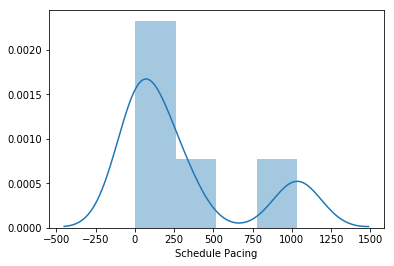

In [87]:
sns.distplot(df2['Schedule Pacing'].sort_values().value_counts())

In [38]:
df2['Location'].unique()

array(['San Francisco', 'Los Angeles', nan, 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [39]:
df2['Track'].unique()

array(['Apps, Explorer', 'Apps', 'Games', nan, 'VR', 'Games, Explorer'],
      dtype=object)

In [40]:
df2['Week'].unique()

array(['Week 1', 'Week 2', 'Week 7', 'Week 3', 'Week 4', 'Week 5',
       'Week 6', 'Week 8'], dtype=object)

In [41]:
df2['Week'].replace('Week\s+', '', regex = True, inplace = True)
df2['Week'].unique()

array(['1', '2', '7', '3', '4', '5', '6', '8'], dtype=object)

In [42]:
df2['Week'] = pd.to_numeric(df2['Week'], errors = 'coerce')
df2['Week'].unique()

array([1, 2, 7, 3, 4, 5, 6, 8])

In [43]:
df2['Rating (Num)'].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2'],
      dtype=object)

In [44]:
df2['Rating (Num)'] = pd.to_numeric(df2['Rating (Num)'], errors = 'coerce')
df2['Rating (Num)'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2])

# Final check 2017 cleaned up

In [45]:
df2

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",1,3,Just right,2017
1,36,Los Angeles,Apps,1,4,A little too fast,2017
2,117,San Francisco,Games,1,4,Way too slow,2017
3,253,NaN,NaN,2,4,A little too fast,2017
4,350,New York City,"Apps, Explorer",1,4,Just right,2017
5,23,Redwood City,Apps,1,5,Just right,2017
6,28,Los Angeles,Apps,7,5,Just right,2017
7,65,San Francisco,Apps,1,5,A little too slow,2017
8,101,Santa Clara,Apps,1,5,A little too slow,2017
9,124,Santa Clara,Apps,1,5,Just right,2017


In [46]:
df2.describe()

,ID,Week,Rating (Num),Year
count,1450.000000,1450.000000,1450.000000,1450.0
mean,757.922069,3.452414,8.415172,2017.0
std,430.382155,1.944931,1.456066,0.0
min,8.000000,1.000000,0.000000,2017.0
25%,386.250000,2.000000,8.000000,2017.0
50%,762.500000,3.000000,9.000000,2017.0
75%,1129.750000,5.000000,10.000000,2017.0
max,1499.000000,8.000000,10.000000,2017.0


# Combining Dataframes

## Pseudo brainstorm
- [X] Combine 2016 & 2017 dataframes
- [ ] Combine ratings
- [X] Combine schedule pacing
- [X] Combine location
- [X] Combine track

In [47]:
dfs = pd.concat([df, df2], ignore_index = True, sort = True)
dfs

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,ID,Location,Rating (Num),Schedule Pacing,Timestamp,Track,Week,What track are you in?,Year,location
0,NaN,6.0,6.0,NaN,NaN,NaN,NaN,8/5/16 1:39,NaN,NaN,NaN,2016,Taipei
1,NaN,6.0,8.0,NaN,NaN,NaN,NaN,8/5/16 1:40,NaN,NaN,NaN,2016,Taipei
2,NaN,6.0,8.0,NaN,NaN,NaN,NaN,8/5/16 1:40,NaN,NaN,NaN,2016,Taipei
3,NaN,8.0,8.0,NaN,NaN,NaN,NaN,8/5/16 1:42,NaN,NaN,NaN,2016,Taipei
4,NaN,8.0,10.0,NaN,NaN,NaN,NaN,8/5/16 1:45,NaN,NaN,NaN,2016,Taipei
5,NaN,6.0,8.0,NaN,NaN,NaN,NaN,8/5/16 1:45,NaN,NaN,NaN,2016,Taipei
6,NaN,6.0,8.0,NaN,NaN,NaN,NaN,8/5/16 1:49,NaN,NaN,NaN,2016,Taipei
7,NaN,6.0,10.0,NaN,NaN,NaN,NaN,8/8/16 1:30,NaN,NaN,NaN,2016,Taipei
8,NaN,6.0,10.0,NaN,NaN,NaN,NaN,8/8/16 1:33,NaN,NaN,NaN,2016,Taipei
9,NaN,6.0,10.0,NaN,NaN,NaN,NaN,8/8/16 1:49,NaN,NaN,NaN,2016,Taipei


In [48]:
df.head(1)

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,location,Year
0,NaN,6.0,6.0,8/5/16 1:39,NaN,Taipei,2016


In [49]:
df.isna().sum()

How likely is it that you would recommend the Make School Summer Academy to a friend?    926
How well is the schedule paced?                                                           65
How would you rate your overall satisfaction with the Summer Academy this week?           65
Timestamp                                                                                 42
What track are you in?                                                                   118
location                                                                                   0
Year                                                                                       0
dtype: int64

In [50]:
df2.head(1)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",1,3,Just right,2017


In [51]:
df2.isna().sum()

ID                  0
Location           44
Track              44
Week                0
Rating (Num)        0
Schedule Pacing     0
Year                0
dtype: int64

In [52]:
dfs['How well is the schedule paced?'].fillna(dfs['Schedule Pacing'], inplace = True)
dfs['Location'].fillna(dfs['location'], inplace = True)
dfs['What track are you in?'].fillna(dfs['Track'], inplace = True)
dfs.drop(columns = ['Schedule Pacing', 'location', 'Track'], inplace = True)


dfs

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,ID,Location,Rating (Num),Timestamp,Week,What track are you in?,Year
0,NaN,6,6.0,NaN,Taipei,NaN,8/5/16 1:39,NaN,NaN,2016
1,NaN,6,8.0,NaN,Taipei,NaN,8/5/16 1:40,NaN,NaN,2016
2,NaN,6,8.0,NaN,Taipei,NaN,8/5/16 1:40,NaN,NaN,2016
3,NaN,8,8.0,NaN,Taipei,NaN,8/5/16 1:42,NaN,NaN,2016
4,NaN,8,10.0,NaN,Taipei,NaN,8/5/16 1:45,NaN,NaN,2016
5,NaN,6,8.0,NaN,Taipei,NaN,8/5/16 1:45,NaN,NaN,2016
6,NaN,6,8.0,NaN,Taipei,NaN,8/5/16 1:49,NaN,NaN,2016
7,NaN,6,10.0,NaN,Taipei,NaN,8/8/16 1:30,NaN,NaN,2016
8,NaN,6,10.0,NaN,Taipei,NaN,8/8/16 1:33,NaN,NaN,2016
9,NaN,6,10.0,NaN,Taipei,NaN,8/8/16 1:49,NaN,NaN,2016


In [55]:
dfs['How well is the schedule paced?'].unique()

array([6.0, 8.0, 2.0, 4.0, 10.0, nan, 'Just right', 'A little too fast',
       'Way too slow', 'A little too slow', 'Way too fast'], dtype=object)

In [53]:
dfs.describe()

,How likely is it that you would recommend the Make School Summer Academy to a friend?,How would you rate your overall satisfaction with the Summer Academy this week?,ID,Rating (Num),Week,Year
count,65.000000,926.00000,1450.000000,1450.000000,1450.000000,2441.000000
mean,8.646154,8.38013,757.922069,8.415172,3.452414,2016.594019
std,1.735932,1.58445,430.382155,1.456066,1.944931,0.491182
min,3.000000,2.00000,8.000000,0.000000,1.000000,2016.000000
25%,8.000000,8.00000,386.250000,8.000000,2.000000,2016.000000
50%,9.000000,8.00000,762.500000,9.000000,3.000000,2017.000000
75%,10.000000,10.00000,1129.750000,10.000000,5.000000,2017.000000
max,10.000000,10.00000,1499.000000,10.000000,8.000000,2017.000000


Just right           1034
A little too fast     289
A little too slow     100
Way too fast           23
Way too slow            4
Name: Schedule Pacing, dtype: int64